## Load the processed dataset

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("./dataset/Processed_Dataset_Combined.csv")
df

,Text1,Text2,Type,Lang,Scores
0,"It that happens, just pull the plug.","if that ever happens, just pull the plug.",train,eng,1.0
1,A black dog running through water.,A black dog is running through some water.,train,eng,1.0
2,I've been searchingthe entire abbey for you.,I'm looking for you all over the abbey.,train,eng,1.0
3,If he is good looking and has a good personali...,"If he's good looking, and a good personality, ...",train,eng,1.0
4,"She does not hate you, she is just annoyed wit...","She doesn't hate you, she is just annoyed.",train,eng,1.0
...,...,...,...,...,...
12698,ይሖዋ “የእውነት አምላክ ” ነው ።,እንዲህ ማድረግ የሚችለው ደግሞ ይሖዋ አምላክ ብቻ ነው ።,dev,amh,0.0
12699,ክረምትና በጋ በምስራቅ አፍሪካ ።,በብዛት በምስራቅ አፍሪካ ይገኛሉ ።,dev,amh,0.0
12700,ይህን ያህል እርግጠኛ እንዲሆን ያደረገው ምንድን ነው ?,ደስተኛ እንዲሆን አስተዋጽኦ ያደረገው ምንድን ነው ?,dev,amh,0.0
12701,ያ የበላ ሰው ከሕዝቡ መካከል ተለይቶ ይጠፋልና ።,መንግስት ግን ፣ “ለእርዳታ የተመደበ ገንዘብ ነው” ሊል ይችላል ።,dev,amh,0.0


In [5]:
df.Lang.unique()

array(['eng', 'tel', 'amh', 'hau', 'ary', 'mar'], dtype=object)

In [6]:
df_tr = df[df.Type == "train"]
df_tr

,Text1,Text2,Type,Lang,Scores
0,"It that happens, just pull the plug.","if that ever happens, just pull the plug.",train,eng,1.00
1,A black dog running through water.,A black dog is running through some water.,train,eng,1.00
2,I've been searchingthe entire abbey for you.,I'm looking for you all over the abbey.,train,eng,1.00
3,If he is good looking and has a good personali...,"If he's good looking, and a good personality, ...",train,eng,1.00
4,"She does not hate you, she is just annoyed wit...","She doesn't hate you, she is just annoyed.",train,eng,1.00
...,...,...,...,...,...
12603,"""लॉकडाऊनच्या काळात सर्वांचे मनोरंजन करणारा हा ...","""त्यामुळे आता भाविकांनाही 500 आणि 1000च्या नोट...",train,mar,0.03
12604,"""या वर्षी धोनीने 6 डावांमध्ये 150.50च्या सरासर...","""इंडियन ग्रॉँप्रीमध्ये सलग तिस-या वर्षी मुख्य ...",train,mar,0.03
12605,"""त्यासोबत भरतपूर जिल्ह्यातील कोरोना आकडेवारी ल...","""ऑस्ट्रेलियन क्रिकेट प्रसारणाच्या ८०हून अधिक व...",train,mar,0.03
12606,"""याप्रकरणी वाकड पोलीस ठाण्यात अज्ञात व्यक्तीवर...","""रणबीर आणि आलिया सध्या बुल्गारियामध्ये त्यांच्...",train,mar,0.03


### Now using the pretrained model find the cosine similarity between Text1 and Text2

In [13]:
import scipy
from sentence_transformers import SentenceTransformer

model_e5 = SentenceTransformer("intfloat/multilingual-e5-large", device="cpu")

In [14]:
count = 0

In [15]:
def compute_similarity_e5(row_data):

    global count
    
    count += 1
    print(count)
    text1, text2 = row_data["Text1"], row_data["Text2"]

    text1_embedding, text2_embedding = model_e5.encode([
        f"query: {text1}", f"query: {text2}"])

    # text1_embedding, text2_embedding = model_e5.encode([text1, text2])

    return 1-scipy.spatial.distance.cosine(text1_embedding, text2_embedding)

In [16]:
df_tr["e5_mean"] = df.apply(lambda ele: compute_similarity_e5(ele), axis=1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


KeyboardInterrupt: 

In [16]:
df_tr

,Text1,Text2,Type,Lang,Scores,e5_mean
0,"It that happens, just pull the plug.","if that ever happens, just pull the plug.",train,eng,1.00,0.986775
1,A black dog running through water.,A black dog is running through some water.,train,eng,1.00,0.996391
2,I've been searchingthe entire abbey for you.,I'm looking for you all over the abbey.,train,eng,1.00,0.974381
3,If he is good looking and has a good personali...,"If he's good looking, and a good personality, ...",train,eng,1.00,0.990028
4,"She does not hate you, she is just annoyed wit...","She doesn't hate you, she is just annoyed.",train,eng,1.00,0.996507
...,...,...,...,...,...,...
12603,"""लॉकडाऊनच्या काळात सर्वांचे मनोरंजन करणारा हा ...","""त्यामुळे आता भाविकांनाही 500 आणि 1000च्या नोट...",train,mar,0.03,0.803851
12604,"""या वर्षी धोनीने 6 डावांमध्ये 150.50च्या सरासर...","""इंडियन ग्रॉँप्रीमध्ये सलग तिस-या वर्षी मुख्य ...",train,mar,0.03,0.842575
12605,"""त्यासोबत भरतपूर जिल्ह्यातील कोरोना आकडेवारी ल...","""ऑस्ट्रेलियन क्रिकेट प्रसारणाच्या ८०हून अधिक व...",train,mar,0.03,0.810075
12606,"""याप्रकरणी वाकड पोलीस ठाण्यात अज्ञात व्यक्तीवर...","""रणबीर आणि आलिया सध्या बुल्गारियामध्ये त्यांच्...",train,mar,0.03,0.825221


array([[<Axes: xlabel='Scores', ylabel='Scores'>,
        <Axes: xlabel='e5_mean', ylabel='Scores'>],
       [<Axes: xlabel='Scores', ylabel='e5_mean'>,
        <Axes: xlabel='e5_mean', ylabel='e5_mean'>]], dtype=object)

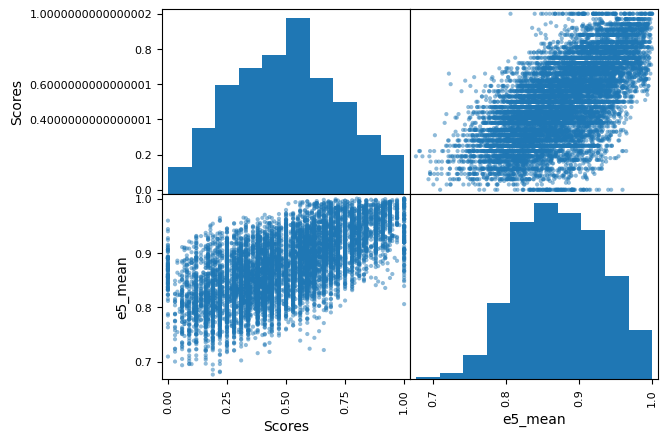

In [17]:
pd.plotting.scatter_matrix(df_tr[["Scores", "e5_mean"]])

In [18]:
pd.DataFrame.corr(df_tr[["Scores", "e5_mean"]], method="spearman")["e5_mean"]["Scores"]

0.664951565775675

In [19]:
df_tr.to_csv("./dataset/with_e5_score_train.csv", index=False)